# Exploring Data with Visuals Quiz
Use the space below to explore `powerplant_data_edited.csv` to answer the quiz questions below.

In [15]:
# Do your analysis and answer the following (use plots) (type your answers, do not just code stuff and runaway):

# What is the relationship between temperature and electrical output?
# A. Positive B. Negative C. No correlation
# B. Negative
# Does the humidity variable appear to be normally distributed, if not, what is the ditribution?
#No ,  left-skewed distribution
# Which variable appears to have the most outliers (plot all variables to answer this)?
# pressure

In [38]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#load the data
df=pd.read_csv("powerplant_data_edited.csv")
df.head()

,temperature,exhaust_vacuum,pressure,humidity,energy_output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [18]:
# explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     9568 non-null   float64
 1   exhaust_vacuum  9568 non-null   float64
 2   pressure        9568 non-null   float64
 3   humidity        9568 non-null   float64
 4   energy_output   9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [19]:
df.shape

(9568, 5)

In [20]:
df.describe()

,temperature,exhaust_vacuum,pressure,humidity,energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Data Preprocessing

The main steps involved in data cleaning are:<br>

- Handling missing data<br>
- Removing duplicates<br>
- Convert data types<br>
- Handling outliers<br>


In [21]:
# clean the data (check for any possible problem and fix it)
sum(df.isnull().sum()) # no null values found

0

In [22]:
df.duplicated().any() # check if there is a duplicated values

True

In [23]:
df.duplicated().sum()

41

In [24]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [25]:
df.dtypes  # great .. no object type here 

temperature       float64
exhaust_vacuum    float64
pressure          float64
humidity          float64
energy_output     float64
dtype: object

In [31]:
for col in df:
    df[col] = df[col].round(decimals=2)
df.head()

,temperature,exhaust_vacuum,pressure,humidity,energy_output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


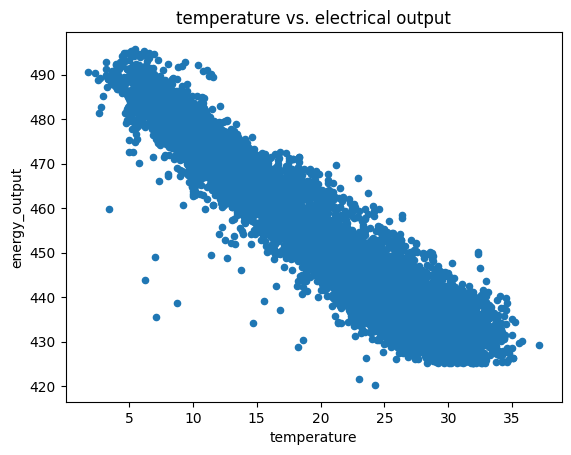

In [33]:
# plot the relationship between temperature and electrical output
# what is the relationship between the temp and the enery_output (type your answer)?: Negative Correlation

# Create a scatter plot of temperature vs. electrical output
df.plot(x='temperature', y='energy_output', kind='scatter')

# Set the title and axis labels
plt.title('temperature vs. electrical output')
plt.xlabel('temperature')
plt.ylabel('energy_output')

# Show the plot|
plt.show()

In [34]:
df['temperature'].corr(df['energy_output'])

-0.9479079067632532

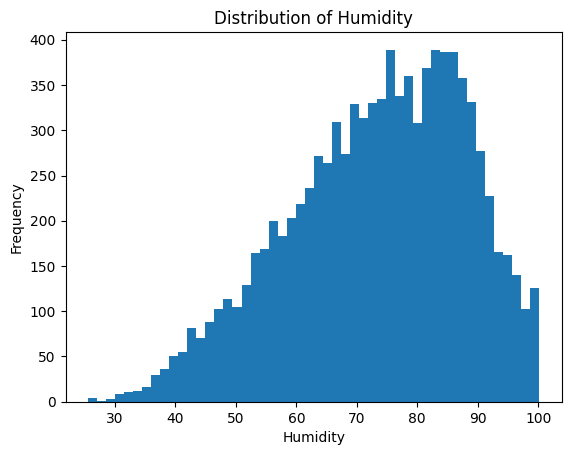

In [51]:
# plot the distribution of humidity
# what does the distribution look like ? :  left-skewed distribution

# Create a histogram of the "humidity" column
df['humidity'].plot(kind='hist',bins=50)

# Set the title and axis labels
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

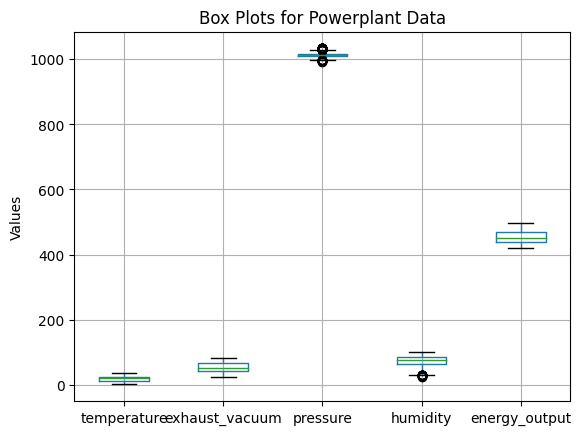

In [53]:
# plot box plots for each variable
# type the variable name here: pressure
df.boxplot()
# Set the title and axis labels
plt.title('Box Plots for Powerplant Data')
plt.ylabel('Values')
plt.show()
# not obvious here 

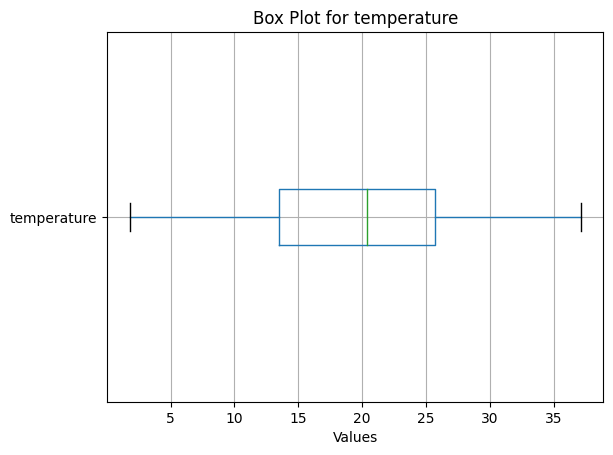

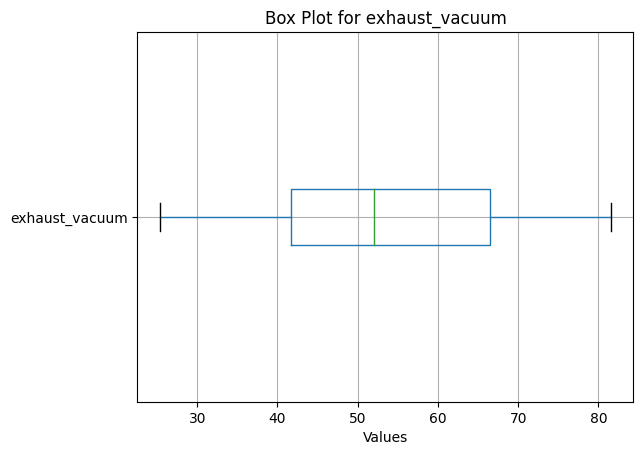

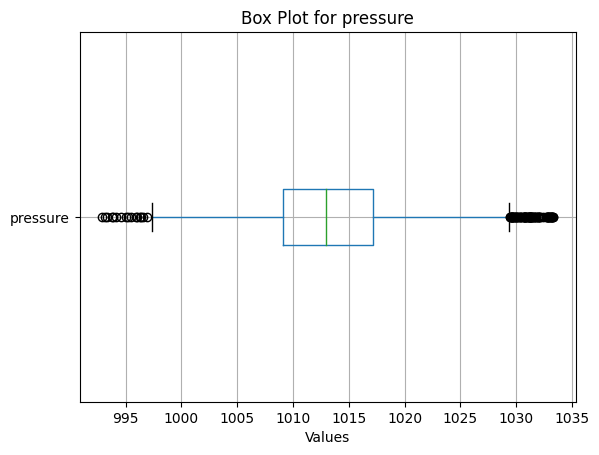

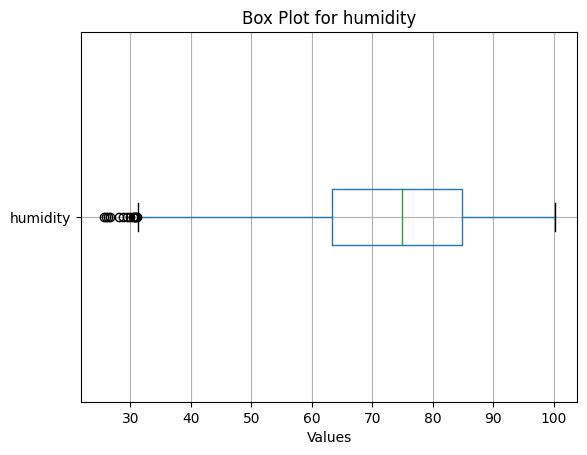

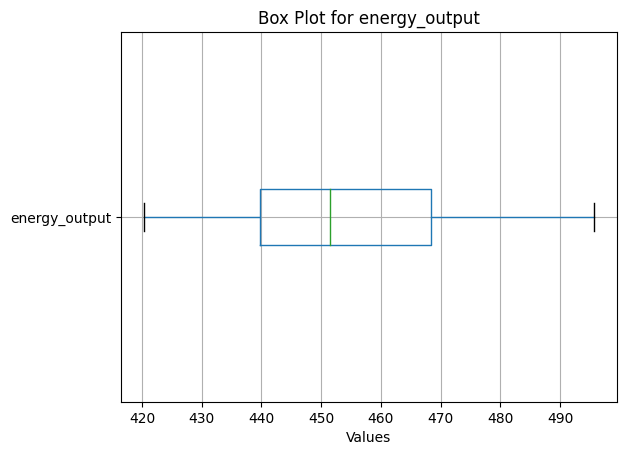

In [61]:
# Another way

# Create box plots for each variable using a for loop
for column in df.columns:
    if df[column].dtype != 'object':  # Only plot numerical columns
        df.boxplot(column=column,vert=False)

        # Set the title and axis labels
        plt.title('Box Plot for ' + column)
        plt.xlabel('Values')

        # Show the plot
        plt.show()

In [63]:
# Count the number of outliers for each variable
for column in df.columns:
    if df[column].dtype != 'object':  # Only count outliers for numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        print(f"{column}: {num_outliers} outliers")

# Show the plot
plt.show()

temperature: 0 outliers
exhaust_vacuum: 0 outliers
pressure: 91 outliers
humidity: 13 outliers
energy_output: 0 outliers
